In [30]:
import pandas as pd
from prompt_toolkit import prompt
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
import investpy
from datetime import datetime

In [31]:
# Read in
site_kpis = pd.read_csv('data/site_kpis.csv')
site_kpis.head()

,Site_ID,Grade_Description,Date,Price,Profit,Volume,Competitor_Price,Fuel_Cost
0,10808,Premium Gas,1/1/2019,2.319,7.60,49.30,1.799000,1.534257
1,10808,Unleaded Gas,1/1/2019,1.769,9.73,1092.01,1.825667,1.323700
2,10838,Midgrade Gas,1/1/2019,2.039,18.81,105.78,2.184000,1.409889
3,10838,Premium Gas,1/1/2019,2.339,25.11,76.57,2.496500,1.534257
4,10838,Unleaded Gas,1/1/2019,1.739,-18.27,255.60,1.784000,1.323700


In [50]:
# Convert Date column to datetime
site_kpis['Date'] =  site_kpis['Date'].apply(pd.to_datetime)
site_kpis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Site_ID            5713 non-null   int64         
 1   Grade_Description  5713 non-null   object        
 2   Date               5713 non-null   datetime64[ns]
 3   Price              5713 non-null   float64       
 4   Profit             5713 non-null   float64       
 5   Volume             5713 non-null   float64       
 6   Competitor_Price   5713 non-null   float64       
 7   Fuel_Cost          5713 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 357.2+ KB


In [51]:
# Print uniques and number of
print(site_kpis.Site_ID.unique())
print(site_kpis.nunique())

[10808 10838 10818]
Site_ID                 3
Grade_Description       3
Date                  731
Price                 179
Profit               4607
Volume               5141
Competitor_Price     1074
Fuel_Cost            1956
dtype: int64


In [52]:
# fig, ax = plt.subplots()
# ax.plot(site_kpis['Date'], site_kpis['Price'])
# ax.set_ylabel('Price')
# # ax.set_xlabel('Date')
# ax.set_title('Price')
# # plt.xticks(rotation=45)
# # ax.properties()['children'][1].set_color('black')
# # ax.properties()['children'][2].set_color('purple')
# fig.set_size_inches(18.5, 10.5)
# plt.grid()
# ax.legend(['Price', 'Competitor Price'], loc='upper left')
# ax.set_facecolor('xkcd:light grey')

In [53]:
# Locate Site_ID 10808
kpi10808 =  site_kpis.loc[site_kpis['Site_ID'] == 10808]
kpi10808.head()

,Site_ID,Grade_Description,Date,Price,Profit,Volume,Competitor_Price,Fuel_Cost
0,10808,Premium Gas,2019-01-01,2.319,7.60,49.30,1.799000,1.534257
1,10808,Unleaded Gas,2019-01-01,1.769,9.73,1092.01,1.825667,1.323700
5,10808,Premium Gas,2019-01-02,2.309,14.78,83.84,1.799000,1.535803
6,10808,Unleaded Gas,2019-01-02,1.759,11.13,1955.47,1.819000,1.325600
10,10808,Premium Gas,2019-01-03,2.299,7.15,56.94,1.799000,1.553484


In [64]:
# Save 10808 to csv
kpi10808.to_csv('data/sites/kpi10808.csv', index=False)

In [65]:
# Locate Site_ID 10818
kpi10818 =  site_kpis.loc[site_kpis['Site_ID'] == 10818]
kpi10818.head()

,Site_ID,Grade_Description,Date,Price,Profit,Volume,Competitor_Price,Fuel_Cost
12,10818,Midgrade Gas,2019-01-03,2.599,0.0,0.0,2.365667,1.454955
47,10818,Midgrade Gas,2019-01-10,2.599,0.0,0.0,2.311500,1.508637
48,10818,Premium Gas,2019-01-10,2.849,0.0,0.0,2.755667,1.611579
67,10818,Midgrade Gas,2019-01-13,2.599,0.0,0.0,2.374000,1.507373
68,10818,Premium Gas,2019-01-13,2.849,0.0,0.0,2.749000,1.616662


In [66]:
# Save 10818 to csv
kpi10818.to_csv('data/sites/kpi10818.csv', index=False)

In [67]:
# Locate Site_ID 10838
kpi10838 =  site_kpis.loc[site_kpis['Site_ID'] == 10838]
kpi10838.head()

,Site_ID,Grade_Description,Date,Price,Profit,Volume,Competitor_Price,Fuel_Cost
2,10838,Midgrade Gas,2019-01-01,2.039,18.81,105.78,2.1840,1.409889
3,10838,Premium Gas,2019-01-01,2.339,25.11,76.57,2.4965,1.534257
4,10838,Unleaded Gas,2019-01-01,1.739,-18.27,255.60,1.7840,1.323700
7,10838,Midgrade Gas,2019-01-02,2.039,18.39,103.41,2.1815,1.434353
8,10838,Premium Gas,2019-01-02,2.339,22.36,68.19,2.4915,1.535803


In [68]:
# Save 10838 to csv
kpi10838.to_csv('data/sites/kpi10838.csv', index=False)

<AxesSubplot:>

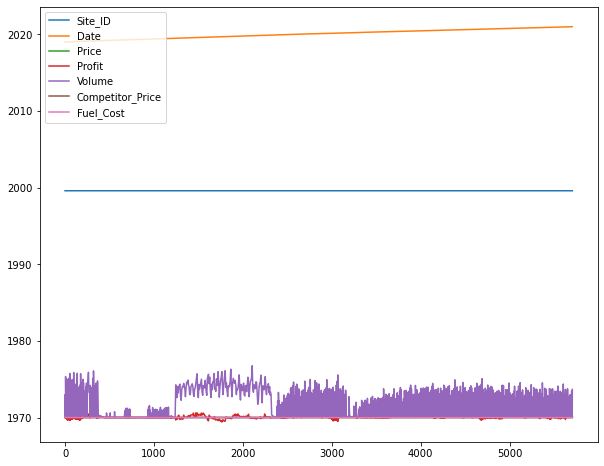

In [56]:
kpi10808.plot(figsize=(10, 8))

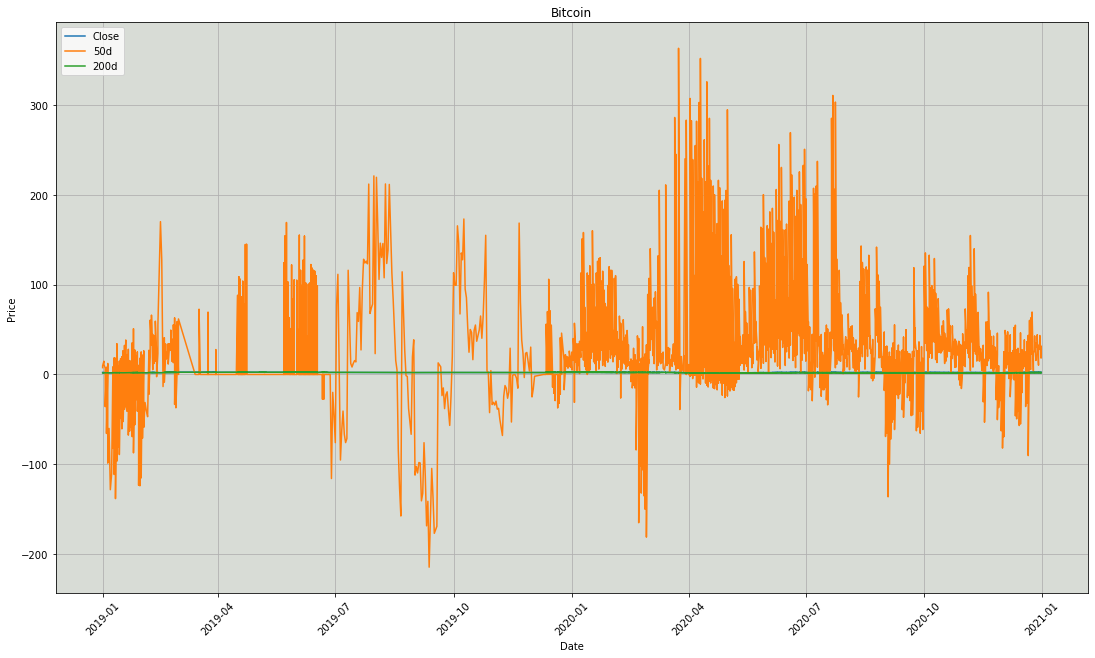

In [59]:
fig, ax = plt.subplots()
ax.plot(kpi10808['Date'], kpi10808[['Price', 'Profit', 'Competitor_Price']])
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.set_title('Bitcoin')
plt.xticks(rotation=45)
# plt.text(x=1970, y=400, s=r'Stock Price at this interval')
# ax.properties()['children'][0].set_color('black')
# ax.properties()['children'][1].set_color('black')
# ax.properties()['children'][2].set_color('purple')
fig.set_size_inches(18.5, 10.5)
plt.grid()
ax.legend(['Close', '50d', '200d'], loc='upper left')
ax.set_facecolor('xkcd:light grey')
# graphPath = 'data/stocks'
# graphName = input('Save graph as: ') + '.png'
# graphFileName = os.path.join(graphPath, graphName)
# plt.savefig(graphFileName)

<AxesSubplot:>

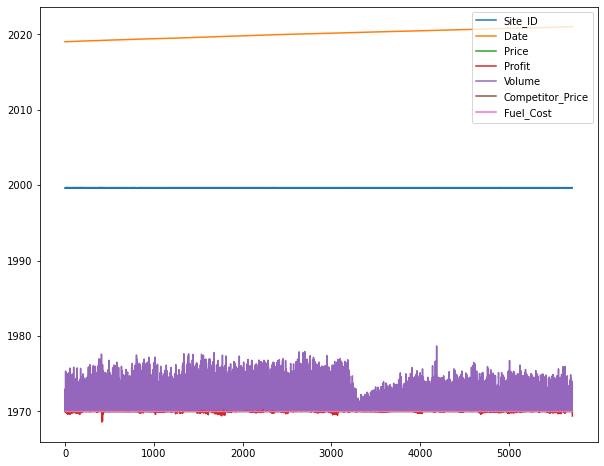

In [57]:
site_kpis.plot(figsize=(10, 8))